In this notebook, we demonstrate the use of `cibinfo` to extract and visualize the cross power between the CIB and other tracers of the large-scale structure, such as weak gravitational lensing.

In [77]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
rcParams['font.size'] = 14
rcParams['text.usetex'] = True

from cibinfo.powerspectra import crosslensing as cxp

# Test package

In [145]:
p13 = cxp.Planck2013(545, unit='uK*sr')
model = cxp.Model(545, unit='uK*sr')

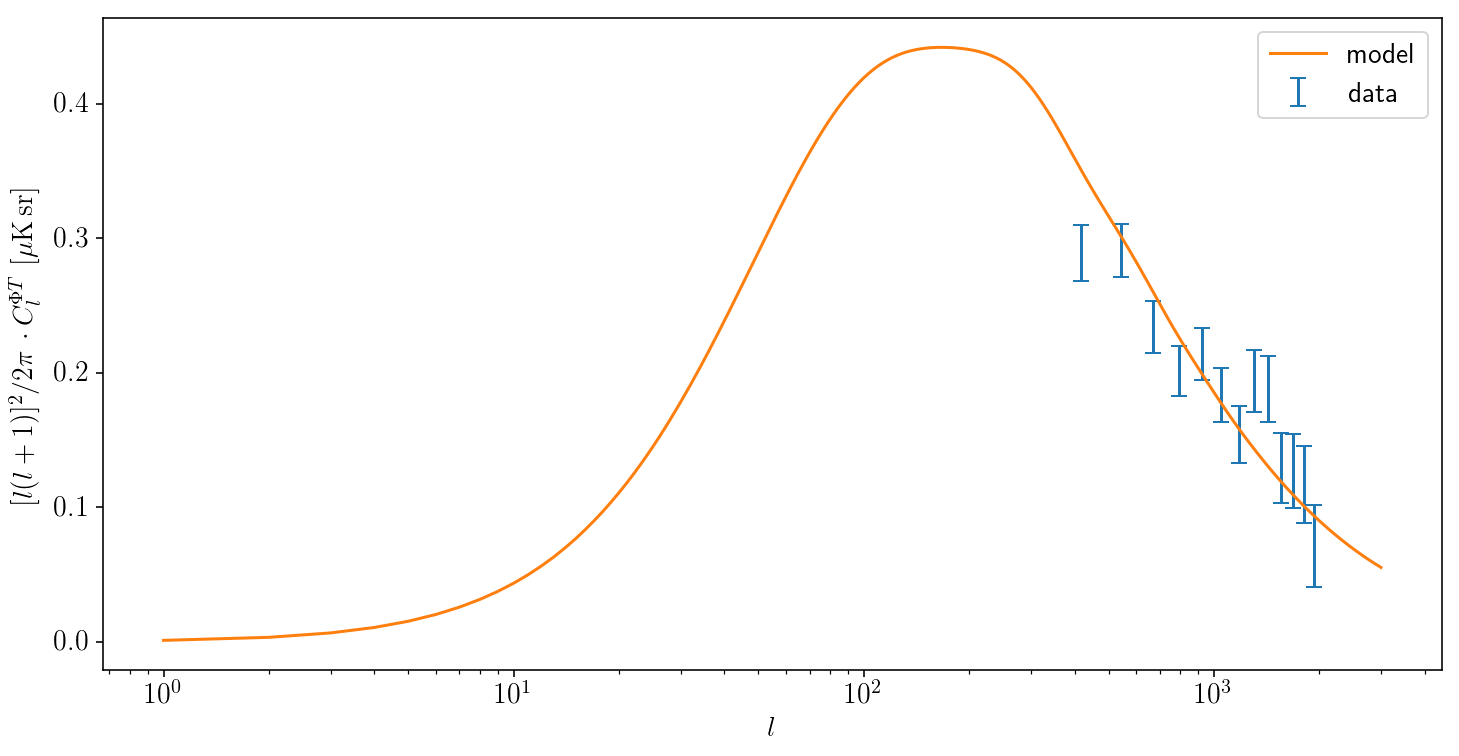

In [152]:
# data
plt.errorbar(
    p13.l,
    p13.l3Cl,
    yerr=p13.dl3Cl,
    label='data',
    ls='None',
    capsize=4.)

# sim
plt.plot(
    model.l,
    model.l3Cl,
    label='model',)

# labels & legend
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel(r'$[l(l+1)]^2/2\pi\,\cdot C_l^{\Phi T}\ [\mu\rm K\, sr]$')
plt.semilogx();